# Problem 18r

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.xsection('default', 1e8, 50000)
xt = mdl.xsection('truss', 50e3, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  6.0, 8.0)
mdl.node('3', 12.0, 8.0)
mdl.node('4', 12.0, 0.0)

mdl.beam('a', n['2'], n['3'])
mdl.beam('b', n['3'], n['4'])
mdl.truss('c', n['1'], n['2'], xsec=xt)

mdl.hinge(e['a'], n['2'])

mdl.fix(n['1'], ['x','y', 'rz'])
mdl.fix(n['2'], ['rz'])
mdl.fix(n['4'], ['x','y', 'rz'])

mdl.numDOF()

[[6, 7, 8], [1, 2, 9], [3, 4, 5], [10, 11, 12]]

The loading is next defined, as follows:

In [3]:
# Define loading
n['2'].p['x']  = -50
e['a'].e0['2'] = -1e-3
e['b'].e0['2'] =  1e-3
e['c'].q0['1'] = 51.143

## Part 1: Degree of indeterminacy

In [4]:
em.analysis.characterize(mdl)

(0, 1)

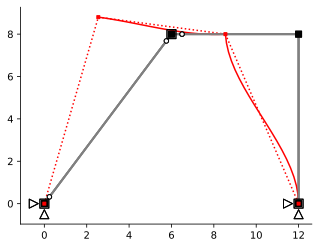

In [5]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)
U_disp, P = em.analysis.SolveDispl(mdl) 
em.plot_U(mdl, U_disp, ax, scale=100)

In [6]:
U_disp

,$U_{{}}$
$1$,-0.034527
$2$,0.008025
$3$,-0.034525
$4$,0.000001
$5$,0.000568


## Part 3: Find member forces

In [7]:
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)
V = A.f@U_disp
V

,$V_{{}}$
$a_1$,0.000002
$a_2$,0.001337
$a_3$,0.001905
$b_1$,0.000001
$b_2$,-0.003748
$b_3$,-0.004316
$c_1$,-0.014297


In [8]:
Ks = em.K_matrix(mdl).s
Q0 = em.Q_vector(B).o
Q = Ks@V + Q0
Q

,$Vector_{{}}$
$a_{1}$,37.795887
$a_{2}$,0.000000
$a_{3}$,97.632904
$b_{1}$,16.272151
$b_{2}$,-97.632904
$b_{3}$,-204.734192
$c_{1}$,-20.340188
